In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%cd /content/gdrive/MyDrive/office/interview/groundup_ai

/content/gdrive/MyDrive/office/interview/groundup_ai


In [3]:
!pwd

/content/gdrive/MyDrive/office/interview/groundup_ai


In [4]:
!pip3 install librosa

In [5]:
DATASET_PATH = "data/ESC-50-master/audio/for_training"

In [6]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Load audio features data

In [7]:
train = pd.read_csv(f'{DATASET_PATH}/train.csv', index_col=0)
val = pd.read_csv(f'{DATASET_PATH}/val.csv', index_col=0)
test = pd.read_csv(f'{DATASET_PATH}/test.csv', index_col=0)

In [8]:
val.tail(10)

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f9994,f9995,f9996,f9997,f9998,f9999,f10000,category,target,path_file
70,0.029669,0.015997,-0.015285,-0.054654,0.041801,0.032032,-0.009148,-0.039445,0.021718,0.045334,...,-7.536478e-02,3.082198e-03,5.064360e-02,1.280204e-02,-8.480035e-02,3.578390e-02,4.559784e-02,hen,6,data/ESC-50-master/audio/5-248341-C-6.wav
71,-0.038249,-0.112605,0.024896,-0.032705,-0.049933,-0.000221,0.009615,0.052711,0.054736,0.025624,...,-1.262210e-03,-2.177469e-03,-6.906279e-03,-6.106560e-03,-6.463389e-03,-5.608087e-03,-1.584561e-03,cow,3,data/ESC-50-master/audio/5-253085-A-3.wav
72,-0.004379,-0.086214,-0.031226,0.034953,-0.042233,-0.050726,-0.055539,-0.011301,0.009223,-0.009899,...,3.935996e-01,-2.699828e-02,-1.960195e-01,-3.431674e-01,-1.106677e-01,3.438044e-01,1.623830e-01,cow,3,data/ESC-50-master/audio/5-253085-B-3.wav
73,-0.015852,-0.014740,-0.067915,0.069025,0.009107,-0.085160,0.054833,0.041343,-0.076835,0.010457,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,cat,5,data/ESC-50-master/audio/5-256452-A-5.wav
74,0.081374,0.044839,0.032259,0.034420,-0.102638,-0.045595,-0.028844,0.039689,-0.000588,-0.092245,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,cat,5,data/ESC-50-master/audio/5-259169-A-5.wav
75,-0.030134,0.014215,-0.010141,0.004434,-0.021898,-0.008663,-0.018415,-0.034854,-0.040297,-0.049351,...,7.457193e-05,-6.030340e-02,-6.537078e-02,-5.902645e-02,-3.755003e-02,-4.242969e-02,-9.656498e-02,crow,9,data/ESC-50-master/audio/5-261325-A-9.wav
76,0.001427,-0.022045,-0.006502,0.034923,-0.043207,-0.014194,0.010906,-0.072729,0.002277,0.004450,...,1.354043e-03,2.175969e-02,2.010184e-02,-1.848239e-02,2.421350e-02,-2.875229e-03,1.357412e-02,hen,6,data/ESC-50-master/audio/5-263831-A-6.wav
77,-0.000748,-0.009554,0.016243,0.007763,0.000490,-0.001851,-0.011928,-0.027573,-0.013128,0.002406,...,-3.465269e-03,4.534442e-03,6.119891e-03,5.438477e-04,1.000913e-03,-6.896871e-03,-1.307005e-03,hen,6,data/ESC-50-master/audio/5-263831-B-6.wav
78,0.045610,0.255242,0.086918,-0.161366,0.072114,0.086550,-0.106064,-0.049394,0.029541,-0.048388,...,-2.572656e-02,-6.123783e-02,-1.294340e-02,1.129867e-02,-8.994826e-03,-3.021973e-03,8.142602e-02,sheep,8,data/ESC-50-master/audio/5-61635-A-8.wav
79,-0.000288,-0.000500,-0.000571,-0.001195,-0.001528,-0.001031,-0.000535,0.000144,-0.000008,-0.000523,...,-2.140275e-14,-1.513769e-14,2.906239e-15,6.518887e-15,2.939402e-15,6.917972e-15,3.212792e-14,dog,0,data/ESC-50-master/audio/5-9032-A-0.wav


In [9]:
import seaborn as sns
from sklearn.base import BaseEstimator, TransformerMixin

In [10]:
def plot_multiple_waveforms(feature_df, row_indices, figsize=(15, 10)):
    """
    Plot multiple feature value plots in a grid layout.

    Parameters:
    feature_df (pd.DataFrame): Feature dataframe containing audio data
    row_indices (list): List of row indices to plot
    figsize (tuple): Figure size (width, height) for the plot

    Returns:
    matplotlib.figure.Figure: The figure object containing all feature plots
    """
    if not row_indices:
        print("No row indices provided")
        return None

    n_plots = len(row_indices)
    n_cols = min(3, n_plots)  # Maximum 3 columns
    n_rows = (n_plots + n_cols - 1) // n_cols  # Calculate required rows

    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    fig.suptitle('Feature Values Comparison', fontsize=16, fontweight='bold')

    # Handle single subplot case
    if n_plots == 1:
        axes = [axes]
    elif n_rows == 1:
        axes = axes if isinstance(axes, (list, np.ndarray)) else [axes]
    else:
        axes = axes.flatten()

    # Extract audio columns once
    audio_columns = [col for col in feature_df.columns if col.startswith('f') and col[1:].isdigit()]
    audio_columns.sort(key=lambda x: int(x[1:]))

    for i, row_idx in enumerate(row_indices):
        if row_idx >= len(feature_df) or row_idx < 0:
            print(f"Skipping row index {row_idx} - out of range")
            continue

        ax = axes[i]
        row_data = feature_df.iloc[row_idx]

        # Extract feature values
        feature_values = row_data[audio_columns].values
        x_positions = range(len(feature_values))

        # Get metadata
        category = row_data.get('category', 'Unknown')
        file_path = row_data.get('file_path', 'Unknown')
        filename = file_path.split('/')[-1] if '/' in str(file_path) else str(file_path)

        # Plot
        ax.plot(x_positions, feature_values, color='blue', linewidth=0.8)
        ax.set_title(f'{category.title()} - {filename}', fontsize=10)
        ax.set_xlabel('Feature Label', fontsize=9)
        ax.set_ylabel('Feature Values', fontsize=9)
        ax.grid(True, alpha=0.3)

        # Set reasonable axis limits
        y_min, y_max = feature_values.min(), feature_values.max()
        y_range = y_max - y_min if y_max != y_min else 1
        ax.set_ylim(y_min - 0.1 * y_range, y_max + 0.1 * y_range)
        ax.set_xlim(0, len(feature_values) - 1)

        # Simplified x-axis labels for subplots
        n_features = len(feature_values)
        if n_features > 20:
            step = max(1, n_features // 5)  # Show ~5 labels for subplots
            tick_positions = [0, n_features//2, n_features-1]
            ax.set_xticks(tick_positions)
            ax.set_xticklabels([f'f1', f'f{n_features//2}', f'f{n_features}'])
        else:
            step = max(1, n_features // 5)
            tick_positions = list(range(0, n_features, step))
            ax.set_xticks(tick_positions)
            ax.set_xticklabels([audio_columns[i] for i in tick_positions], rotation=45)

    # Hide unused subplots
    for i in range(n_plots, len(axes)):
        axes[i].set_visible(False)

    plt.tight_layout()
    return fig


def plot_feature(filtered_feature, idx=100):
    """
    Creates a detailed visualization of residual intensity across features.

    Parameters:
    -----------
    filtered_feature : pandas.DataFrame
        DataFrame containing the filtered feature data
    idx : int, default=700
        Index of the row to plot

    Returns:
    --------
    matplotlib.figure.Figure
        The created figure object
    """
    # Set style
    sns.set_style("whitegrid")
    sns.set_context("notebook", font_scale=1.2)

    # Create figure
    fig = plt.figure(figsize=(14, 4), dpi=100)

    # Get data for plotting
    data = filtered_feature.iloc[idx]

    # Plot data with enhanced styling
    data.plot(
        color='#2E86C1',
        linewidth=2.5,
        marker='o',
        markersize=2,
        markerfacecolor='white',
        markeredgecolor='#2E86C1',
        markeredgewidth=2
    )

    # Set dynamic y-axis limits with padding
    y_min = data.min()
    y_max = data.max()
    padding = (y_max - y_min) * 0.1
    plt.ylim(y_min - padding, y_max + padding)

    # Customize plot appearance
    plt.title('Residual Intensity Across Features',
             fontsize=14,
             pad=20,
             fontfamily='serif')

    plt.xlabel('Feature Number',
              fontsize=12,
              labelpad=10,
              fontfamily='serif')

    plt.ylabel('Residual Intensity',
              fontsize=12,
              labelpad=10,
              fontfamily='serif')

    # Customize ticks
    plt.xticks(fontsize=10, rotation=45)
    plt.yticks(fontsize=10)

    # Customize grid
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.grid(axis='x', visible=False)

    # Remove top and right spines
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Add shading under the line
    plt.fill_between(range(len(data)),
                    data,
                    y_min - padding,
                    alpha=0.15,
                    color='#2E86C1')

    # Add padding to prevent cutoff
    plt.tight_layout()

    return fig

In [17]:
class FourierTransform(BaseEstimator, TransformerMixin):
    def __init__(self, example_row_idx=None):
        self.example_row_idx = example_row_idx

    def fit(self, X=None, y=None):
        return self

    def _plot_magnitude_spectrum(self, magnitude, idx, max_freq_bins=50):
        """FFT magnitude spectrum without DC component."""
        import matplotlib.pyplot as plt
        import numpy as np

        magnitude_to_plot = magnitude[idx]

        # Skip the DC component (bin 0) and plot bins 1 to max_freq_bins
        magnitude_to_plot = magnitude_to_plot[1:max_freq_bins+1]

        plt.figure(figsize=(12, 6))
        plt.bar(range(1, len(magnitude_to_plot)+1), magnitude_to_plot,
                color='steelblue', alpha=0.4)
        plt.title(f"FFT Magnitude Spectrum - Sample {idx} (Bins 1-{max_freq_bins}, DC removed)", fontsize=14, fontfamily='serif')
        plt.xlabel("Frequency Bin", fontsize=12, fontfamily='serif')
        plt.ylabel("Magnitude", fontsize=12, fontfamily='serif')
        plt.grid(True, alpha=0.3)
        plt.xticks(fontsize=8, fontfamily='serif')
        plt.yticks(fontsize=8, fontfamily='serif')

        plt.show()

    def transform(self, X: pd.DataFrame, y=None):
        f_columns = [col for col in X.columns if col.startswith('f')]

        # Filter to only numeric columns
        numeric_columns = []
        for col in f_columns:
            if pd.api.types.is_numeric_dtype(X[col]):
                numeric_columns.append(col)
            else:
                print(f"Skipping non-numeric column: {col} (dtype: {X[col].dtype})")

        if not numeric_columns:
            raise ValueError("No numeric columns starting with 'f' found")

        print(f"Using {len(numeric_columns)} numeric f columns out of {len(f_columns)} total f columns")
        feature = X[numeric_columns].copy()

        data_array = feature.values
        fft_values = np.fft.fft(data_array, axis=1)

        # Compute magnitude for all rows simultaneously
        magnitude = np.abs(fft_values)
        if self.example_row_idx >= magnitude.shape[0]:
            plot_idx = 0
            print(f"Warning: example_row_idx {self.example_row_idx} is out of bounds. Using index 0.")
        else:
            plot_idx = self.example_row_idx

        self._plot_magnitude_spectrum(magnitude, idx=plot_idx)
        max_magnitude = np.max(magnitude, axis=1, keepdims=True)

        # Create noise mask for all rows
        threshold = 0.05
        noise_mask = magnitude < (threshold * max_magnitude)
        fft_values[noise_mask] = 0
        filtered_data = np.fft.ifft(fft_values, axis=1).real

        X[numeric_columns] = filtered_data
        #plot_feature(X[numeric_columns].copy(), idx=self.example_row_idx)

        return X

## Apply Fourier based denoising
- do Fourier transform -> frequency domain
- high frequency removal (low pass filter) -> noises usually concentrated around high frequencies
- do inverse fourier -> back to time domain feature as initial, but with reduced noises

Using 10000 numeric f columns out of 10000 total f columns


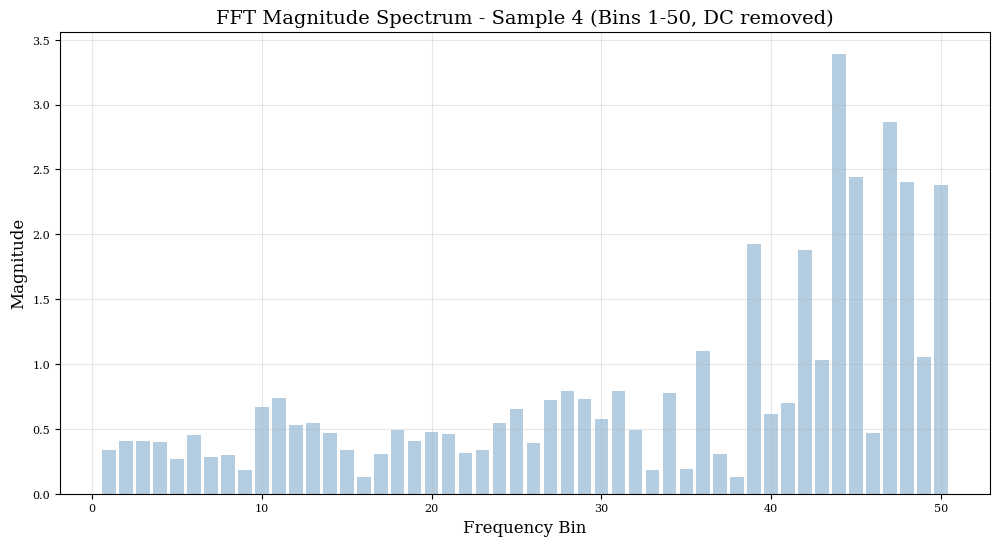

In [18]:
fourier = FourierTransform(example_row_idx=4)
fourier_train = fourier.fit_transform(train.copy())

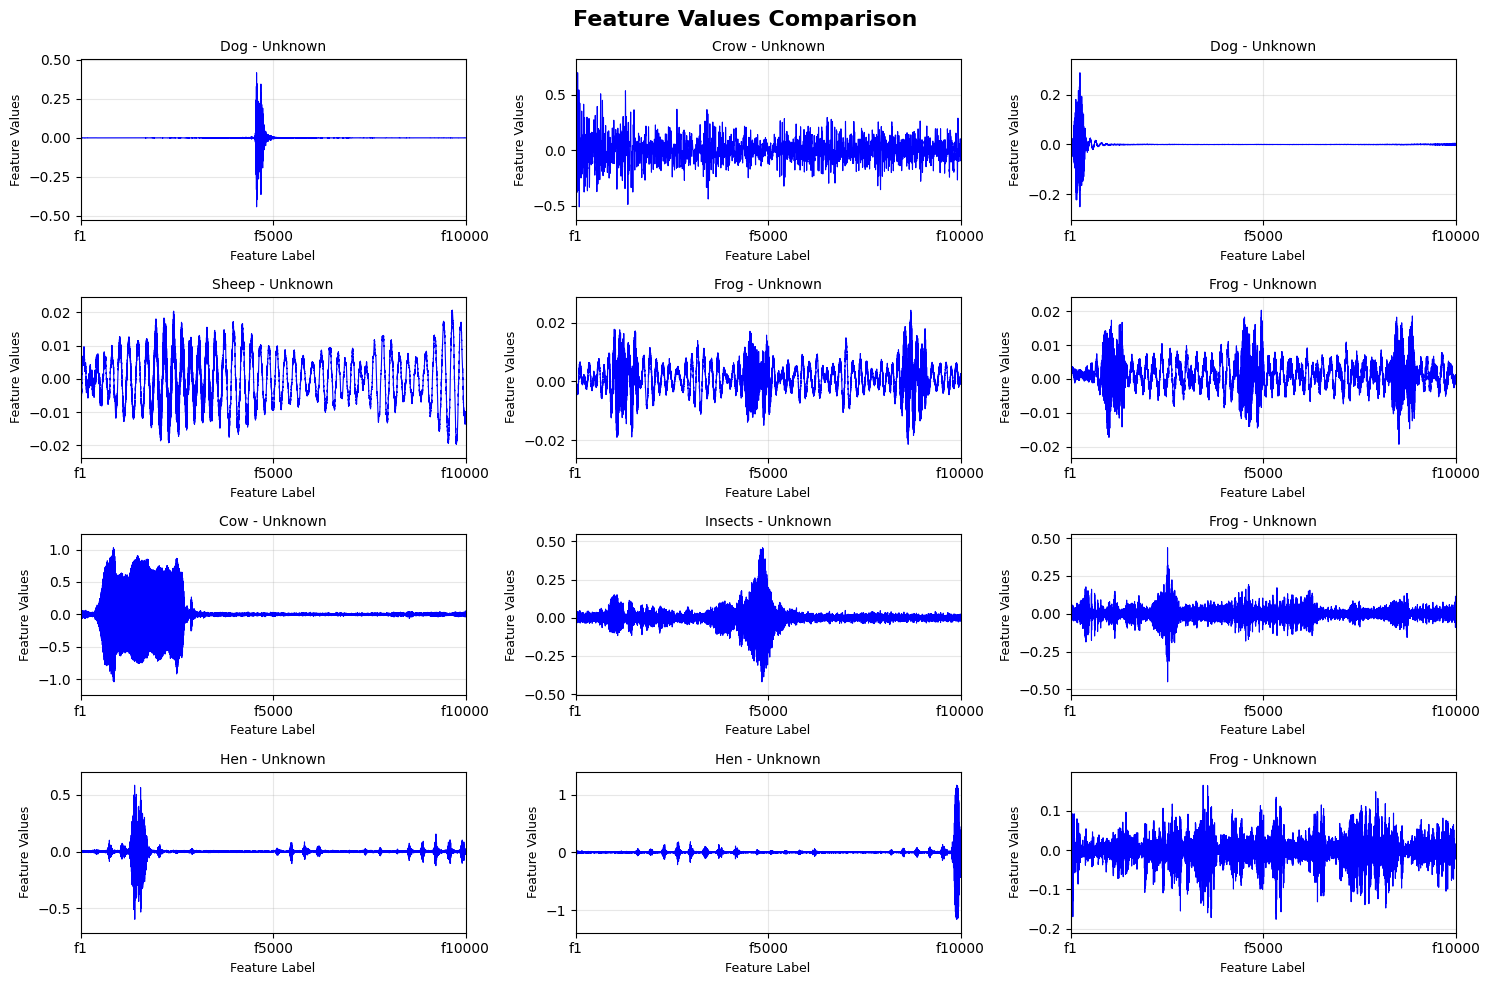

In [19]:
fig2 = plot_multiple_waveforms(fourier_train, row_indices=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
plt.show()

Using 10000 numeric f columns out of 10000 total f columns


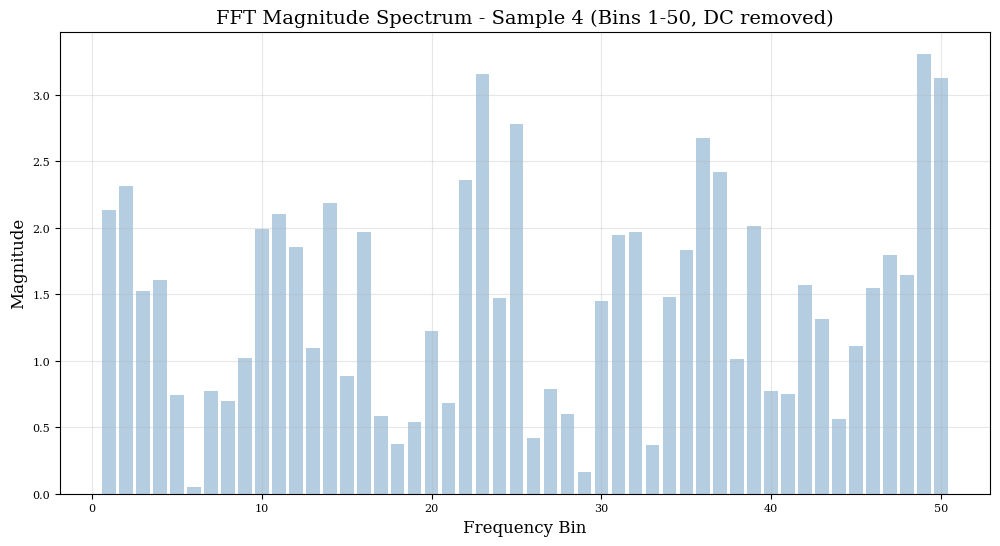

In [20]:
fourier_val = fourier.fit_transform(val.copy())

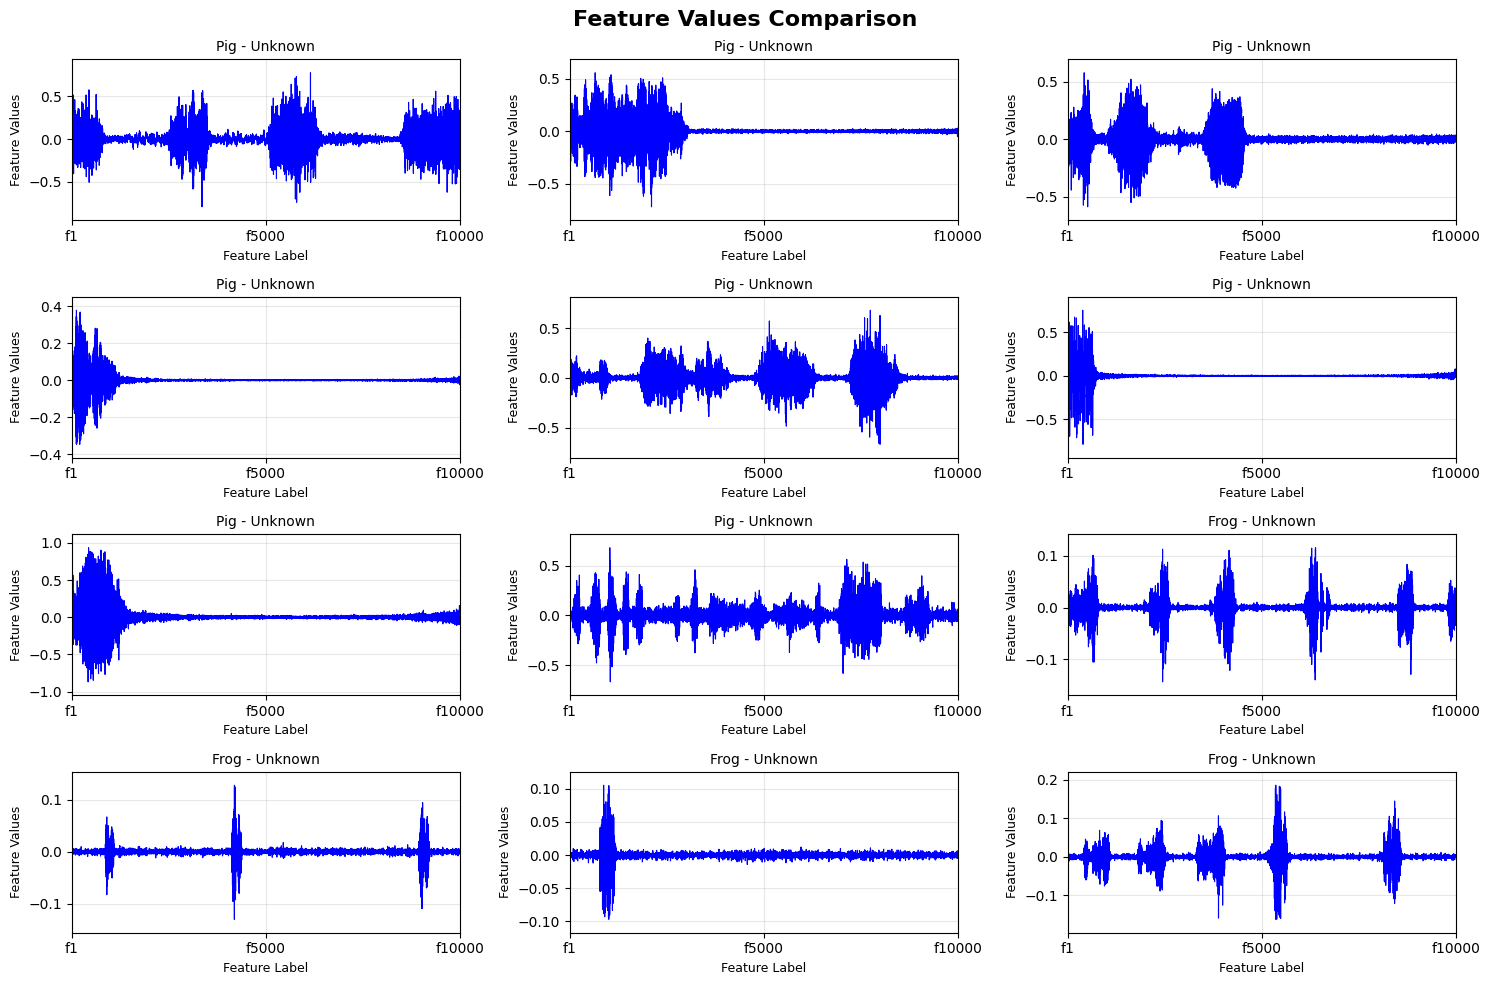

In [21]:
fig2 = plot_multiple_waveforms(fourier_val, row_indices=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
plt.show()

In [22]:
import numpy as np
from sklearn.manifold import TSNE

In [25]:
def plot_tsne(feature_df, figsize=(8, 6), n_components=2, perplexity=30, random_state=42,
              animal_labels=None, sample_size=None):
    """
    Plot t-SNE visualization of audio features colored by target categories.

    Parameters:
    feature_df (pd.DataFrame): Feature dataframe with 'f' prefix columns and 'target' column
    figsize (tuple): Figure size (width, height) for the plot
    n_components (int): Number of components for t-SNE (default: 2 for 2D plot)
    perplexity (float): Perplexity parameter for t-SNE (default: 30)
    random_state (int): Random seed for reproducible results
    animal_labels (list): List of animal category names for legend
    sample_size (int): If specified, randomly sample this many points for faster computation

    Returns:
    dict: Dictionary containing:
        - 'fig': matplotlib figure object
        - 'tsne_results': t-SNE transformed coordinates
        - 'targets': corresponding target values
        - 'categories': corresponding category names
    """
    if animal_labels is None:
        animal_labels = ["Dog", "Rooster", "Pig", "Cow", "Frog", "Cat", "Hen", "Insects", "Sheep", "Crow"]

    if feature_df.empty:
        print("Feature dataframe is empty")
        return None

    # Extract feature columns (f1, f2, f3, ...)
    feature_columns = [col for col in feature_df.columns if col.startswith('f') and col[1:].isdigit()]
    feature_columns.sort(key=lambda x: int(x[1:]))  # Sort numerically

    if not feature_columns:
        print("No feature columns found (columns starting with 'f')")
        return None

    if 'target' not in feature_df.columns:
        print("No 'target' column found in dataframe")
        return None

    # Extract features and targets
    X = feature_df[feature_columns].values
    targets = feature_df['target'].values
    categories = feature_df.get('category', ['unknown'] * len(feature_df)).values

    # Sample data if requested (for faster computation with large datasets)
    if sample_size is not None and len(X) > sample_size:
        print(f"Sampling {sample_size} points from {len(X)} total points for faster computation...")
        sample_indices = np.random.choice(len(X), size=sample_size, replace=False)
        X = X[sample_indices]
        targets = targets[sample_indices]
        categories = categories[sample_indices]

    print(f"Running t-SNE on {len(X)} samples with {len(feature_columns)} features...")
    print(f"t-SNE parameters: perplexity={perplexity}, random_state={random_state}")

    # Apply t-SNE
    tsne = TSNE(n_components=n_components, perplexity=perplexity, random_state=random_state,
                verbose=1, n_iter=1000)
    tsne_results = tsne.fit_transform(X)

    # Create the plot
    fig, ax = plt.subplots(figsize=figsize)

    # Get unique targets and create color map
    unique_targets = np.unique(targets)
    colors = plt.cm.tab10(np.linspace(0, 1, len(unique_targets)))

    # Plot each target class with different color
    for i, target in enumerate(unique_targets):
        mask = targets == target

        # Get category name for this target
        if target < len(animal_labels):
            label = f"{animal_labels[target]} (target={target})"
        else:
            label = f"Target {target}"

        ax.scatter(tsne_results[mask, 0], tsne_results[mask, 1],
                  c=[colors[i]], label=label, alpha=0.7, s=50)

    # Customize the plot
    ax.set_xlabel('t-SNE Component 1', fontsize=12)
    ax.set_ylabel('t-SNE Component 2', fontsize=12)
    ax.set_title('t-SNE Visualization of Audio Features\nColored by Animal Categories',
                fontsize=14, fontweight='bold')
    ax.grid(True, alpha=0.3)

    # Add legend
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

    # Add statistics text
    stats_text = f'Samples: {len(X)} | Features: {len(feature_columns)} | Classes: {len(unique_targets)}'
    ax.text(0.02, 0.98, stats_text, transform=ax.transAxes, fontsize=10,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    # Tight layout to prevent legend cutoff
    plt.tight_layout()

    print(f"t-SNE completed successfully!")
    print(f"Plot shows {len(unique_targets)} different classes with {len(X)} total points")

    return {
        'fig': fig,
        'tsne_results': tsne_results,
        'targets': targets,
        'categories': categories
    }

def plot_tsne_comparison(train_df, val_df, test_df, figsize=(15, 5), perplexity=30,
                        random_state=42, animal_labels=None, sample_size=None):
    """
    Plot t-SNE visualizations for train, validation, and test sets side by side.

    Parameters:
    train_df, val_df, test_df (pd.DataFrame): Feature dataframes for each split
    figsize (tuple): Figure size for the entire plot
    perplexity (float): Perplexity parameter for t-SNE
    random_state (int): Random seed for reproducible results
    animal_labels (list): List of animal category names
    sample_size (int): If specified, sample this many points from each set

    Returns:
    dict: Dictionary containing results for each split
    """
    if animal_labels is None:
        animal_labels = ["Dog", "Rooster", "Pig", "Cow", "Frog", "Cat", "Hen", "Insects", "Sheep", "Crow"]

    fig, axes = plt.subplots(1, 3, figsize=figsize)
    fig.suptitle('t-SNE Visualization Comparison: Train vs Validation vs Test',
                fontsize=16, fontweight='bold')

    datasets = [('Train', train_df), ('Validation', val_df), ('Test', test_df)]
    results = {}

    for idx, (split_name, df) in enumerate(datasets):
        if df.empty:
            axes[idx].text(0.5, 0.5, f'No {split_name} Data',
                          transform=axes[idx].transAxes, ha='center', va='center')
            continue

        # Extract features and targets
        feature_columns = [col for col in df.columns if col.startswith('f') and col[1:].isdigit()]
        feature_columns.sort(key=lambda x: int(x[1:]))

        X = df[feature_columns].values
        targets = df['target'].values

        # Sample if requested
        if sample_size is not None and len(X) > sample_size:
            sample_indices = np.random.choice(len(X), size=sample_size, replace=False)
            X = X[sample_indices]
            targets = targets[sample_indices]

        # Apply t-SNE
        tsne = TSNE(n_components=2, perplexity=perplexity, random_state=random_state,
                   verbose=0, n_iter=1000)
        tsne_results = tsne.fit_transform(X)

        # Plot
        unique_targets = np.unique(targets)
        colors = plt.cm.tab10(np.linspace(0, 1, len(unique_targets)))

        for i, target in enumerate(unique_targets):
            mask = targets == target
            label = animal_labels[target] if target < len(animal_labels) else f"Target {target}"
            axes[idx].scatter(tsne_results[mask, 0], tsne_results[mask, 1],
                            c=[colors[i]], label=label, alpha=0.7, s=30)

        axes[idx].set_title(f'{split_name} Set ({len(X)} samples)', fontsize=12)
        axes[idx].set_xlabel('t-SNE Component 1', fontsize=10)
        axes[idx].set_ylabel('t-SNE Component 2', fontsize=10)
        axes[idx].grid(True, alpha=0.3)

        # Add legend only to the last subplot
        if idx == 2:
            axes[idx].legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)

        results[split_name.lower()] = {
            'tsne_results': tsne_results,
            'targets': targets
        }

    plt.tight_layout()

    return {
        'fig': fig,
        'results': results
    }

    # Create cross-tabulation of category vs fold
    cross_tab = pd.crosstab(animal_df['category'], animal_df['fold'], margins=True)

    # Calculate statistics
    total_per_label = cross_tab.iloc[:-1, -1]  # Exclude 'All' row and column
    total_per_fold = cross_tab.iloc[-1, :-1]   # Exclude 'All' row and column
    overall_total = cross_tab.iloc[-1, -1]     # The 'All'/'All' cell

    # Create clean summary table without margins
    summary_table = cross_tab.iloc[:-1, :-1]

    # Print formatted statistics
    print("=== Animal Label Distribution Across Folds ===\n")
    print("Summary Table:")
    print(summary_table)
    print(f"\nTotal samples per label:")
    for label, count in total_per_label.items():
        print(f"  {label}: {count}")

    print(f"\nTotal samples per fold:")
    for fold, count in total_per_fold.items():
        print(f"  Fold {fold}: {count}")

    print(f"\nOverall total animal samples: {overall_total}")

    # Calculate percentages
    print(f"\nLabel distribution (%):")
    for label, count in total_per_label.items():
        percentage = (count / overall_total) * 100
        print(f"  {label}: {percentage:.1f}%")

    return {
        'summary_table': summary_table,
        'total_per_label': total_per_label,
        'total_per_fold': total_per_fold,
        'overall_total': overall_total,
        'animal_df': animal_df
    }

Running t-SNE on 280 samples with 10000 features...
t-SNE parameters: perplexity=30, random_state=42
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 280 samples in 0.009s...
[t-SNE] Computed neighbors for 280 samples in 0.055s...
[t-SNE] Computed conditional probabilities for sample 280 / 280
[t-SNE] Mean sigma: 0.666877


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] KL divergence after 250 iterations with early exaggeration: 119.719742
[t-SNE] KL divergence after 1000 iterations: 1.436545
t-SNE completed successfully!
Plot shows 10 different classes with 280 total points


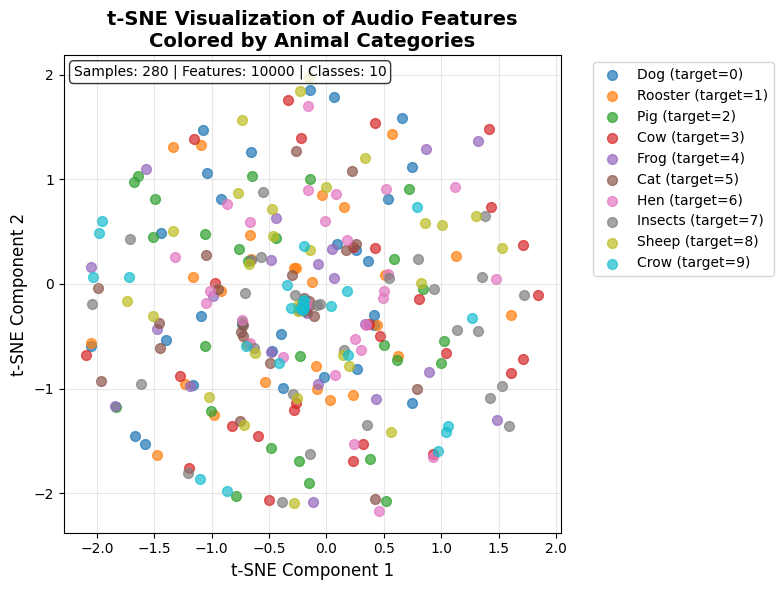

In [26]:
tsne_result = plot_tsne(train)
plt.show()

In [27]:
def shuffle_dataframe(df, random_state=42, reset_index=True):
    """
    Shuffle the rows of a pandas DataFrame randomly.

    Parameters:
    df (pd.DataFrame): Input DataFrame to shuffle
    random_state (int): Random seed for reproducible shuffling (default: 42)
    reset_index (bool): Whether to reset the index after shuffling (default: True)

    Returns:
    pd.DataFrame: Shuffled DataFrame
    """
    if df.empty:
        print("DataFrame is empty")
        return df.copy()

    # Shuffle the DataFrame
    shuffled_df = df.sample(frac=1, random_state=random_state)

    # Reset index if requested
    if reset_index:
        shuffled_df = shuffled_df.reset_index(drop=True)

    print(f"Shuffled {len(df)} rows with random_state={random_state}")

    return shuffled_df

In [28]:
# reduced noise audio
fourier_train = shuffle_dataframe(fourier_train)
fourier_val = shuffle_dataframe(fourier_val)

# original audio
train = shuffle_dataframe(train)
val = shuffle_dataframe(val)
test = shuffle_dataframe(test)

Shuffled 280 rows with random_state=42
Shuffled 80 rows with random_state=42
Shuffled 280 rows with random_state=42
Shuffled 80 rows with random_state=42
Shuffled 40 rows with random_state=42


## Background removal

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from sklearn.preprocessing import StandardScaler

def separate_audio_features(df, index=0, method='amplitude_threshold'):
    """
    Separate main audio features from background noise using various methods.

    Parameters:
    -----------
    df : pd.DataFrame
        DataFrame with feature columns (prefixed with 'f') and 'target' column
    index : int
        Row index to process
    method : str
        Method to use: 'amplitude_threshold', 'energy_based', 'spectral_centroid', 'combined'

    Returns:
    --------
    dict : Contains original data, separated features, and background
    """
    # Get feature columns and data
    feature_cols = [col for col in df.columns if col.startswith('f')]
    sound_data = df.iloc[index][feature_cols].values
    animal_class = df.iloc[index]['target']

    results = {
        'original': sound_data,
        'animal_class': animal_class,
        'method': method
    }

    if method == 'amplitude_threshold':
        # Method 1: Amplitude-based thresholding
        threshold = np.percentile(np.abs(sound_data), 90)
        main_features_mask = np.abs(sound_data) > threshold

        main_features = sound_data.copy()
        background = sound_data.copy()

        main_features[~main_features_mask] = 0
        background[main_features_mask] = 0

    elif method == 'energy_based':
        # Method 2: Energy-based windowing
        window_size = 100
        energy_threshold = 0.1

        # Calculate energy in sliding windows
        energies = []
        for i in range(0, len(sound_data) - window_size, window_size//2):
            window = sound_data[i:i+window_size]
            energy = np.sum(window**2) / window_size
            energies.append(energy)

        # Create mask based on energy
        main_features_mask = np.zeros(len(sound_data), dtype=bool)
        for i, energy in enumerate(energies):
            start_idx = i * (window_size//2)
            end_idx = min(start_idx + window_size, len(sound_data))
            if energy > energy_threshold:
                main_features_mask[start_idx:end_idx] = True

        main_features = sound_data.copy()
        background = sound_data.copy()

        main_features[~main_features_mask] = 0
        background[main_features_mask] = 0

    elif method == 'spectral_centroid':
        # Method 3: Spectral features (simplified approach)
        # Use derivative to find rapid changes (characteristic of animal sounds)
        derivative = np.abs(np.diff(sound_data))
        derivative = np.append(derivative, derivative[-1])  # Make same length

        deriv_threshold = np.percentile(derivative, 80)
        main_features_mask = derivative > deriv_threshold

        # Expand mask to include neighboring samples
        expanded_mask = np.zeros_like(main_features_mask)
        for i in range(len(main_features_mask)):
            if main_features_mask[i]:
                start = max(0, i-25)
                end = min(len(main_features_mask), i+25)
                expanded_mask[start:end] = True

        main_features = sound_data.copy()
        background = sound_data.copy()

        main_features[~expanded_mask] = 0
        background[expanded_mask] = 0

    elif method == 'combined':
        # Method 4: Combined approach
        # Amplitude threshold
        amp_threshold = np.percentile(np.abs(sound_data), 70)
        amp_mask = np.abs(sound_data) > amp_threshold

        # Energy-based
        window_size = 50
        energy_threshold = 0.05
        energy_mask = np.zeros(len(sound_data), dtype=bool)

        for i in range(0, len(sound_data) - window_size, window_size//4):
            window = sound_data[i:i+window_size]
            energy = np.sum(window**2) / window_size
            if energy > energy_threshold:
                start_idx = i
                end_idx = min(i + window_size, len(sound_data))
                energy_mask[start_idx:end_idx] = True

        # Combine masks
        main_features_mask = amp_mask | energy_mask

        main_features = sound_data.copy()
        background = sound_data.copy()

        main_features[~main_features_mask] = 0
        background[main_features_mask] = 0

    results['main_features'] = main_features
    results['background'] = background
    results['main_features_mask'] = main_features_mask

    return results

def plot_separation_results(results, figsize=(15, 10)):
    """
    Plot the separation results.
    """
    fig, axes = plt.subplots(3, 1, figsize=figsize)

    # Original signal
    axes[0].plot(results['original'], 'b-', alpha=0.7)
    axes[0].set_title(f"Original Signal - {results['animal_class']} ({results['method']})")
    axes[0].set_ylabel('Amplitude')
    axes[0].grid(True, alpha=0.3)

    # Main features
    axes[1].plot(results['main_features'], 'r-', alpha=0.8)
    axes[1].set_title('Extracted Main Features (Animal Sounds)')
    axes[1].set_ylabel('Amplitude')
    axes[1].grid(True, alpha=0.3)

    # Background
    axes[2].plot(results['background'], 'g-', alpha=0.8)
    axes[2].set_title('Background/Noise')
    axes[2].set_xlabel('Feature Index')
    axes[2].set_ylabel('Amplitude')
    axes[2].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

def analyze_separation_quality(results):
    """
    Analyze the quality of separation.
    """
    original = results['original']
    main_features = results['main_features']
    background = results['background']

    # Calculate statistics
    original_energy = np.sum(original**2)
    main_energy = np.sum(main_features**2)
    background_energy = np.sum(background**2)

    # Signal-to-noise ratio
    snr = 10 * np.log10(main_energy / (background_energy + 1e-10))

    # Feature concentration
    main_feature_ratio = np.count_nonzero(main_features) / len(main_features)

    print(f"Separation Analysis:")
    print(f"Original Signal Energy: {original_energy:.4f}")
    print(f"Main Features Energy: {main_energy:.4f} ({100*main_energy/original_energy:.1f}%)")
    print(f"Background Energy: {background_energy:.4f} ({100*background_energy/original_energy:.1f}%)")
    print(f"Signal-to-Noise Ratio: {snr:.2f} dB")
    print(f"Main Feature Coverage: {100*main_feature_ratio:.1f}% of samples")

# Example usage function
def compare_separation_methods(df, index=0):
    """
    Compare different separation methods on the same audio sample.
    """
    methods = ['amplitude_threshold', 'energy_based', 'spectral_centroid', 'combined']

    for method in methods:
        print(f"\n{'='*50}")
        print(f"Method: {method.upper()}")
        print(f"{'='*50}")

        results = separate_audio_features(df, index=index, method=method)
        analyze_separation_quality(results)
        plot_separation_results(results, figsize=(12, 8))

# Advanced filtering function
def apply_advanced_filtering(df, index=0):
    """
    Apply advanced signal processing techniques for better separation.
    """
    feature_cols = [col for col in df.columns if col.startswith('f')]
    sound_data = df.iloc[index][feature_cols].values

    # 1. Median filtering to remove impulse noise
    filtered_signal = signal.medfilt(sound_data, kernel_size=5)

    # 2. Bandpass filtering (assuming animal sounds are in specific frequency range)
    # Note: This is a simplified approach - in practice, you'd need sampling rate info
    b, a = signal.butter(4, [0.1, 0.9], btype='band')
    bandpass_filtered = signal.filtfilt(b, a, filtered_signal)

    # 3. Adaptive thresholding
    window_size = 200
    adaptive_threshold = np.zeros_like(bandpass_filtered)

    for i in range(len(bandpass_filtered)):
        start = max(0, i - window_size//2)
        end = min(len(bandpass_filtered), i + window_size//2)
        window = bandpass_filtered[start:end]
        adaptive_threshold[i] = np.mean(np.abs(window)) + 2 * np.std(np.abs(window))

    # Create adaptive mask
    adaptive_mask = np.abs(bandpass_filtered) > adaptive_threshold

    # Extract features
    main_features = bandpass_filtered.copy()
    main_features[~adaptive_mask] = 0

    return {
        'original': sound_data,
        'filtered': bandpass_filtered,
        'main_features': main_features,
        'adaptive_threshold': adaptive_threshold,
        'mask': adaptive_mask
    }

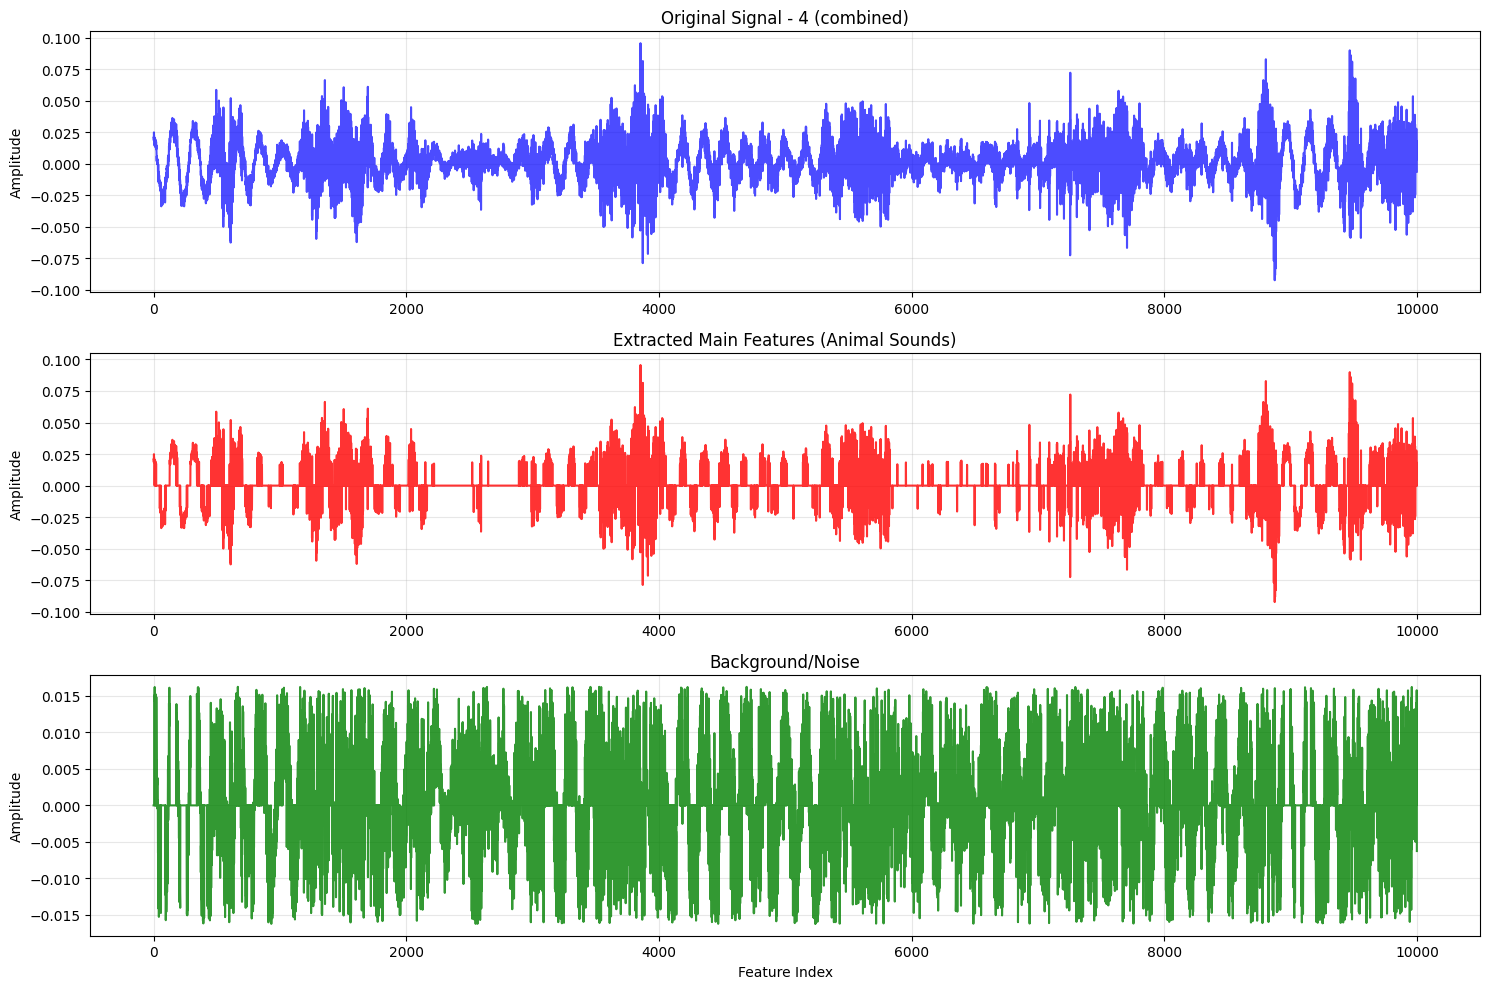

Separation Analysis:
Original Signal Energy: 2.8446
Main Features Energy: 2.3543 (82.8%)
Background Energy: 0.4903 (17.2%)
Signal-to-Noise Ratio: 6.81 dB
Main Feature Coverage: 30.0% of samples


In [30]:
results = separate_audio_features(val, index=4, method='combined')
plot_separation_results(results)
analyze_separation_quality(results)


Method: AMPLITUDE_THRESHOLD
Separation Analysis:
Original Signal Energy: 37.9900
Main Features Energy: 31.5305 (83.0%)
Background Energy: 6.4595 (17.0%)
Signal-to-Noise Ratio: 6.89 dB
Main Feature Coverage: 10.0% of samples


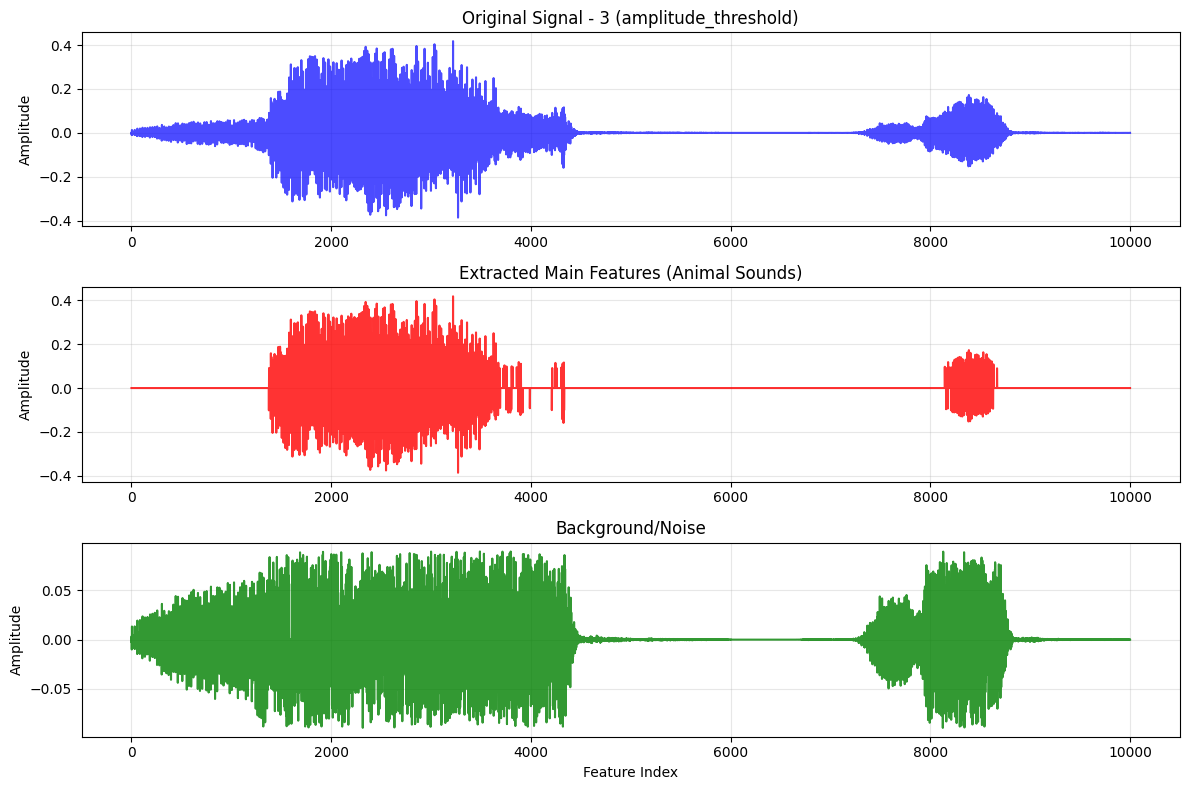


Method: ENERGY_BASED
Separation Analysis:
Original Signal Energy: 37.9900
Main Features Energy: 0.0000 (0.0%)
Background Energy: 37.9900 (100.0%)
Signal-to-Noise Ratio: -inf dB
Main Feature Coverage: 0.0% of samples


/tmp/ipython-input-29-2678654631.py:171: RuntimeWarning: divide by zero encountered in log10
  snr = 10 * np.log10(main_energy / (background_energy + 1e-10))


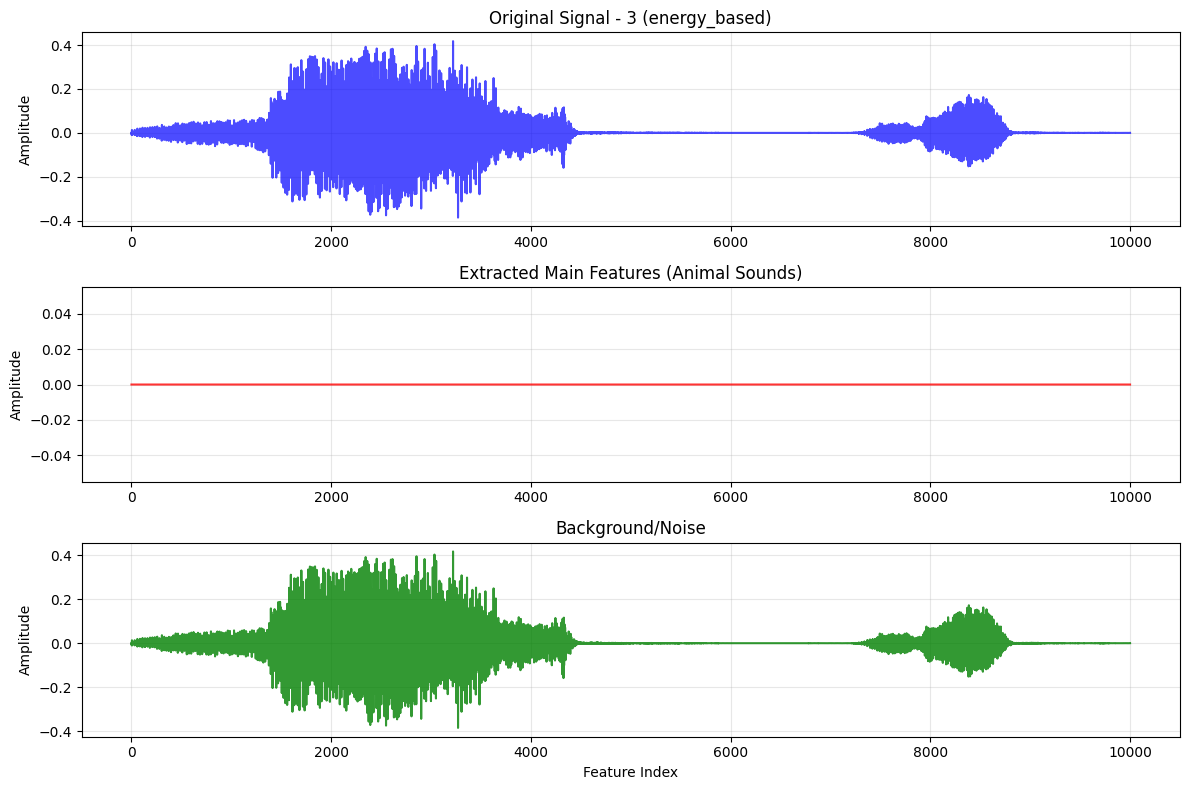


Method: SPECTRAL_CENTROID
Separation Analysis:
Original Signal Energy: 37.9900
Main Features Energy: 37.8373 (99.6%)
Background Energy: 0.1527 (0.4%)
Signal-to-Noise Ratio: 23.94 dB
Main Feature Coverage: 49.0% of samples


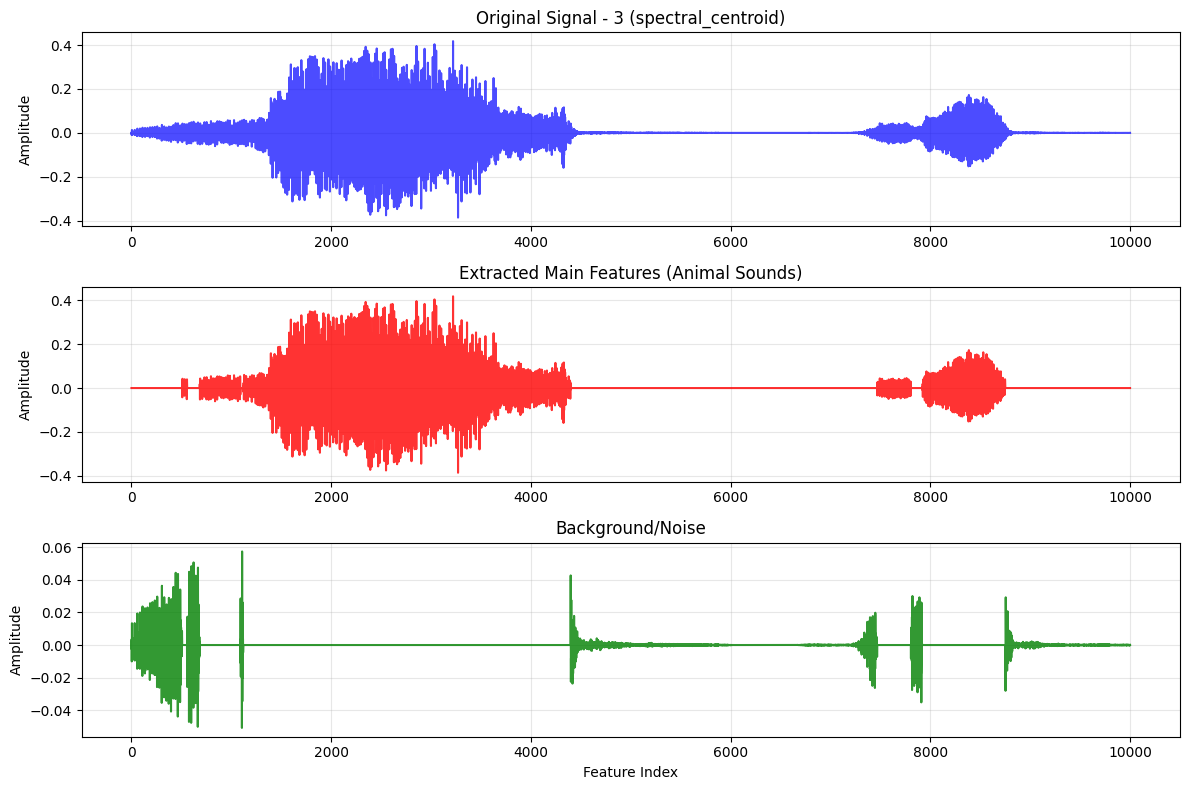


Method: COMBINED
Separation Analysis:
Original Signal Energy: 37.9900
Main Features Energy: 37.5037 (98.7%)
Background Energy: 0.4863 (1.3%)
Signal-to-Noise Ratio: 18.87 dB
Main Feature Coverage: 30.0% of samples


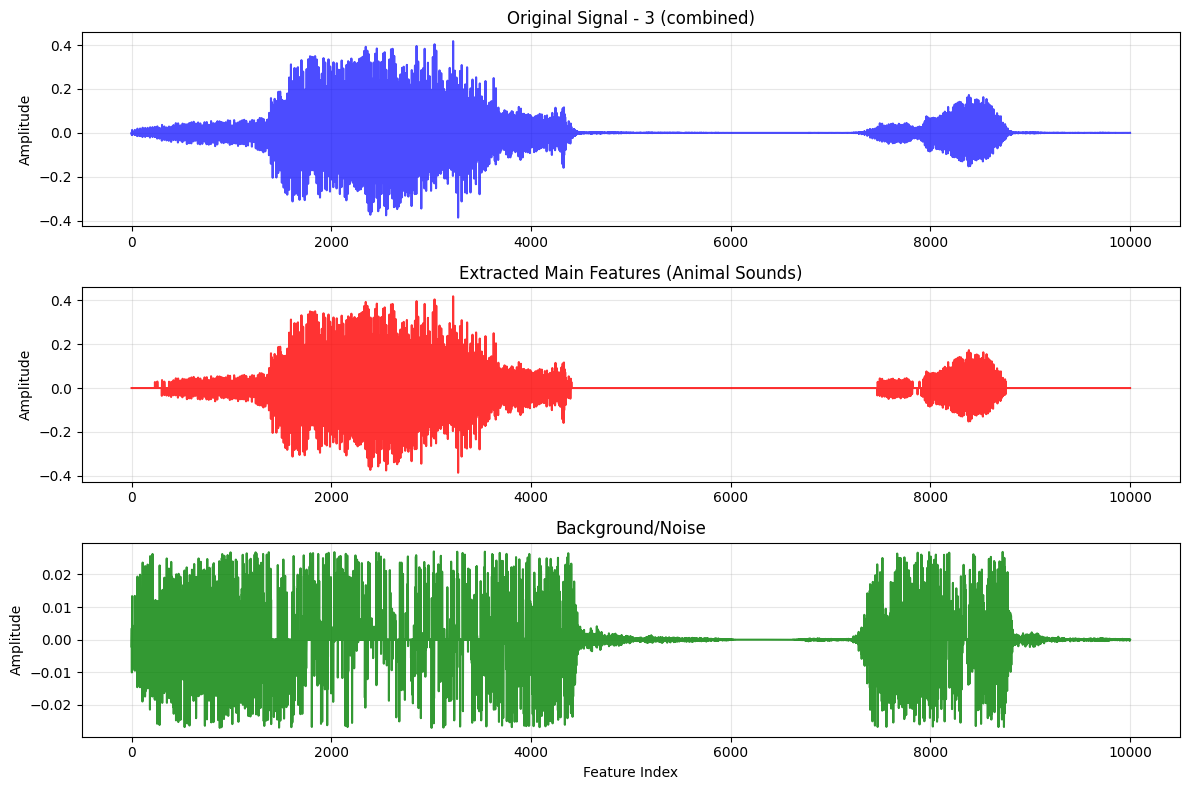

In [31]:
compare_separation_methods(val, index=2)

## Adaptive background removal

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore

def adaptive_temporal_separation(df, index=0, method='adaptive_clustering'):
    """
    Advanced separation method that handles both balanced and imbalanced temporal distributions.

    Parameters:
    -----------
    df : pd.DataFrame
        DataFrame with feature columns (prefixed with 'f') and 'target' column
    index : int
        Row index to process
    method : str
        Method: 'adaptive_clustering', 'local_energy', 'multi_threshold', 'temporal_percentile'
    """
    feature_cols = [col for col in df.columns if col.startswith('f')]
    sound_data = df.iloc[index][feature_cols].values
    animal_class = df.iloc[index]['target']

    results = {
        'original': sound_data,
        'animal_class': animal_class,
        'method': method
    }

    if method == 'adaptive_clustering':
        # Method 1: Adaptive clustering based on local activity

        # Calculate local energy with multiple window sizes
        window_sizes = [50, 100, 200]
        energy_maps = []

        for window_size in window_sizes:
            energy_map = np.zeros_like(sound_data)
            for i in range(len(sound_data)):
                start = max(0, i - window_size//2)
                end = min(len(sound_data), i + window_size//2 + 1)
                window = sound_data[start:end]
                energy_map[i] = np.sum(window**2) / len(window)
            energy_maps.append(energy_map)

        # Combine energy maps
        combined_energy = np.mean(energy_maps, axis=0)

        # Use adaptive threshold based on distribution characteristics
        # Check if distribution is imbalanced (high variance relative to mean)
        combined_energy = np.array(combined_energy, dtype=np.float64)  # Ensure float type

        # Calculate coefficient of variation to detect distribution type
        cv = np.std(combined_energy) / (np.mean(combined_energy) + 1e-10)
        energy_range = np.max(combined_energy) - np.min(combined_energy)
        mean_energy = np.mean(combined_energy)

        # Detect if signal is imbalanced (sparse with high peaks) or balanced (distributed)
        is_imbalanced = cv > 1.0  # High coefficient of variation indicates sparse/imbalanced
        has_significant_activity = mean_energy > np.percentile(combined_energy, 25)

        if is_imbalanced:
            # For imbalanced: use lower percentile to catch sparse but significant events
            threshold = np.percentile(combined_energy, 55)
        else:
            # For balanced: check if there's overall significant activity
            if has_significant_activity and energy_range > mean_energy:
                # Balanced with significant activity - use lower threshold to capture distributed vocals
                threshold = np.percentile(combined_energy, 50)  # More inclusive
            else:
                # Balanced but low activity - use higher threshold
                threshold = np.percentile(combined_energy, 70)

        main_features_mask = combined_energy > threshold

    elif method == 'local_energy':
        # Method 2: Local energy with adaptive windowing

        # Compute running standard deviation to find active regions
        window_size = 100
        local_std = np.zeros_like(sound_data)

        for i in range(len(sound_data)):
            start = max(0, i - window_size//2)
            end = min(len(sound_data), i + window_size//2 + 1)
            window = sound_data[start:end]
            local_std[i] = np.std(window)

        # Find regions with high local variation
        std_threshold = np.percentile(local_std, 65)  # Lower threshold for sparse signals
        high_activity_mask = local_std > std_threshold

        # Combine with amplitude information
        amp_threshold = np.percentile(np.abs(sound_data), 70)
        amp_mask = np.abs(sound_data) > amp_threshold

        # Combine masks
        main_features_mask = high_activity_mask | amp_mask

    elif method == 'multi_threshold':
        # Method 3: Multiple threshold approach

        abs_signal = np.abs(sound_data)

        # Global threshold
        global_threshold = np.percentile(abs_signal, 70)
        global_mask = abs_signal > global_threshold

        # Local adaptive threshold
        window_size = 200
        local_threshold_map = np.zeros_like(abs_signal)

        for i in range(len(abs_signal)):
            start = max(0, i - window_size//2)
            end = min(len(abs_signal), i + window_size//2 + 1)
            local_window = abs_signal[start:end]
            local_threshold_map[i] = np.mean(local_window) + 1.5 * np.std(local_window)

        local_mask = abs_signal > local_threshold_map

        # Gradient-based detection (rapid changes)
        gradient = np.abs(np.gradient(sound_data))
        gradient_threshold = np.percentile(gradient, 80)
        gradient_mask = gradient > gradient_threshold

        # Combine all masks
        main_features_mask = global_mask | local_mask | gradient_mask

    elif method == 'temporal_percentile':
        # Method 4: Temporal percentile approach

        # Divide signal into segments and analyze each separately
        n_segments = 20
        segment_length = len(sound_data) // n_segments
        main_features_mask = np.zeros_like(sound_data, dtype=bool)

        for i in range(n_segments):
            start_idx = i * segment_length
            end_idx = min((i + 1) * segment_length, len(sound_data))
            segment = sound_data[start_idx:end_idx]

            if len(segment) == 0:
                continue

            # Calculate segment statistics
            segment_energy = np.sum(segment**2) / len(segment)
            segment_std = np.std(segment)

            # Adaptive threshold for this segment
            if segment_energy > np.percentile([np.sum(sound_data[j*segment_length:(j+1)*segment_length]**2)/segment_length
                                            for j in range(n_segments) if j*segment_length < len(sound_data)], 50):
                # High energy segment - use stricter threshold
                threshold = np.percentile(np.abs(segment), 70)
            else:
                # Low energy segment - use more lenient threshold
                threshold = np.percentile(np.abs(segment), 50)

            segment_mask = np.abs(segment) > threshold
            main_features_mask[start_idx:end_idx] = segment_mask

    # Post-processing: morphological operations to clean up the mask
    main_features_mask = morphological_cleanup(main_features_mask)

    # Create separated signals
    main_features = sound_data.copy()
    background = sound_data.copy()

    main_features[~main_features_mask] = 0
    background[main_features_mask] = 0

    results.update({
        'main_features': main_features,
        'background': background,
        'main_features_mask': main_features_mask,
        'separation_stats': calculate_separation_stats(sound_data, main_features, background)
    })

    return results

def morphological_cleanup(mask, min_object_size=10, max_gap_size=5):
    """
    Clean up the binary mask using morphological operations.
    """
    # Remove small isolated regions
    cleaned_mask = mask.copy()

    # Find connected components (simple 1D version)
    components = []
    current_component = []

    for i, val in enumerate(mask):
        if val:
            current_component.append(i)
        else:
            if len(current_component) > 0:
                components.append(current_component)
                current_component = []

    if len(current_component) > 0:
        components.append(current_component)

    # Remove small components
    for component in components:
        if len(component) < min_object_size:
            cleaned_mask[component] = False

    # Fill small gaps between nearby components
    filled_mask = cleaned_mask.copy()
    for i in range(len(filled_mask) - max_gap_size):
        if filled_mask[i] and not filled_mask[i + max_gap_size]:
            # Check if there's a component within max_gap_size
            for j in range(i + 1, min(i + max_gap_size + 1, len(filled_mask))):
                if filled_mask[j]:
                    filled_mask[i:j] = True
                    break

    return filled_mask

def calculate_separation_stats(original, main_features, background):
    """
    Calculate detailed statistics about the separation quality.
    """
    original_energy = np.sum(original**2)
    main_energy = np.sum(main_features**2)
    background_energy = np.sum(background**2)

    # Coverage statistics
    main_coverage = np.count_nonzero(main_features) / len(main_features)
    background_coverage = np.count_nonzero(background) / len(background)

    # Signal concentration
    main_peak_ratio = np.max(np.abs(main_features)) / (np.mean(np.abs(main_features)) + 1e-10)

    # Temporal distribution
    main_regions = find_active_regions(main_features != 0)

    return {
        'original_energy': original_energy,
        'main_energy': main_energy,
        'background_energy': background_energy,
        'energy_separation_ratio': main_energy / (background_energy + 1e-10),
        'main_coverage': main_coverage,
        'background_coverage': background_coverage,
        'main_peak_ratio': main_peak_ratio,
        'num_main_regions': len(main_regions),
        'main_regions': main_regions
    }

def find_active_regions(mask):
    """
    Find continuous active regions in the mask.
    """
    regions = []
    start = None

    for i, val in enumerate(mask):
        if val and start is None:
            start = i
        elif not val and start is not None:
            regions.append((start, i - 1))
            start = None

    if start is not None:
        regions.append((start, len(mask) - 1))

    return regions

def visualize_advanced_separation(results, figsize=(15, 12)):
    """
    Enhanced visualization for temporal separation results.
    """
    fig, axes = plt.subplots(4, 1, figsize=figsize)

    stats = results['separation_stats']

    # Original signal
    axes[0].plot(results['original'], 'b-', alpha=0.7, linewidth=0.8)
    axes[0].set_title(f"Original Signal - {results['animal_class']} ({results['method']})")
    axes[0].set_ylabel('Amplitude')
    axes[0].grid(True, alpha=0.3)

    # Separation mask
    mask_display = results['main_features_mask'].astype(float) * np.max(np.abs(results['original']))
    axes[1].fill_between(range(len(mask_display)), 0, mask_display, alpha=0.6, color='orange')
    axes[1].set_title('Detected Main Feature Regions')
    axes[1].set_ylabel('Active Regions')
    axes[1].grid(True, alpha=0.3)

    # Main features
    axes[2].plot(results['main_features'], 'r-', alpha=0.8, linewidth=0.8)
    axes[2].set_title(f'Extracted Main Features (Coverage: {stats["main_coverage"]:.1%}, Regions: {stats["num_main_regions"]})')
    axes[2].set_ylabel('Amplitude')
    axes[2].grid(True, alpha=0.3)

    # Background
    axes[3].plot(results['background'], 'g-', alpha=0.8, linewidth=0.8)
    axes[3].set_title(f'Background/Noise (Energy Ratio: {stats["energy_separation_ratio"]:.2f})')
    axes[3].set_xlabel('Feature Index')
    axes[3].set_ylabel('Amplitude')
    axes[3].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Print detailed statistics
    print(f"\n=== Separation Analysis ===")
    print(f"Method: {results['method']}")
    print(f"Animal Class: {results['animal_class']}")
    print(f"Main Feature Coverage: {stats['main_coverage']:.1%}")
    print(f"Number of Main Regions: {stats['num_main_regions']}")
    print(f"Energy Separation Ratio: {stats['energy_separation_ratio']:.2f}")
    print(f"Peak Concentration Ratio: {stats['main_peak_ratio']:.2f}")

    if stats['main_regions']:
        print(f"Main Regions (start, end): {stats['main_regions'][:5]}")  # Show first 5

def compare_temporal_methods(df, index=0):
    """
    Compare different temporal-aware separation methods.
    """
    methods = ['adaptive_clustering', 'local_energy', 'multi_threshold', 'temporal_percentile']

    for method in methods:
        print(f"\n{'='*60}")
        print(f"Method: {method.upper()}")
        print(f"{'='*60}")

        results = adaptive_temporal_separation(df, index=index, method=method)
        visualize_advanced_separation(results, figsize=(12, 10))

In [42]:
def detect_signal_distribution_type(sound_data):
    """
    Analyze signal to determine if it's balanced (distributed) or imbalanced (sparse).

    Returns:
    --------
    dict: Analysis results including distribution type and recommended approach
    """
    abs_signal = np.abs(sound_data)

    # Calculate various distribution metrics
    mean_amp = np.mean(abs_signal)
    std_amp = np.std(abs_signal)
    cv = std_amp / (mean_amp + 1e-10)  # Coefficient of variation

    # Energy distribution analysis
    total_energy = np.sum(sound_data**2)

    # Divide signal into segments and analyze energy distribution
    n_segments = 20
    segment_length = len(sound_data) // n_segments
    segment_energies = []

    for i in range(n_segments):
        start_idx = i * segment_length
        end_idx = min((i + 1) * segment_length, len(sound_data))
        if end_idx > start_idx:
            segment = sound_data[start_idx:end_idx]
            segment_energy = np.sum(segment**2) / len(segment)
            segment_energies.append(segment_energy)

    segment_energies = np.array(segment_energies)

    # Calculate energy concentration metrics
    energy_cv = np.std(segment_energies) / (np.mean(segment_energies) + 1e-10)

    # Count segments with significant energy (above median)
    active_segments = np.sum(segment_energies > np.median(segment_energies))
    activity_ratio = active_segments / len(segment_energies)

    # Determine distribution type
    is_balanced = (energy_cv < 1.5) and (activity_ratio > 0.6)
    is_imbalanced = (energy_cv > 2.0) or (activity_ratio < 0.4)

    # Overall activity level
    signal_strength = mean_amp / (np.percentile(abs_signal, 10) + 1e-10)
    has_strong_signal = signal_strength > 2.0

    return {
        'is_balanced': is_balanced,
        'is_imbalanced': is_imbalanced,
        'has_strong_signal': has_strong_signal,
        'coefficient_variation': cv,
        'energy_cv': energy_cv,
        'activity_ratio': activity_ratio,
        'signal_strength': signal_strength,
        'mean_amplitude': mean_amp,
        'recommended_method': 'balanced_distributed' if is_balanced else 'sparse_targeted'
    }

def smart_adaptive_separation(df, index=0):
    """
    Intelligent separation that first analyzes the signal type, then applies appropriate method.
    """
    feature_cols = [col for col in df.columns if col.startswith('f')]
    sound_data = np.array(df.iloc[index][feature_cols].values, dtype=np.float64)
    animal_class = df.iloc[index]['target']

    # Analyze signal distribution
    signal_analysis = detect_signal_distribution_type(sound_data)

    # print(f"Signal Analysis for {animal_class} (Index {index}):")
    # print(f"  Balanced: {signal_analysis['is_balanced']}")
    # print(f"  Imbalanced: {signal_analysis['is_imbalanced']}")
    # print(f"  Strong Signal: {signal_analysis['has_strong_signal']}")
    # print(f"  Activity Ratio: {signal_analysis['activity_ratio']:.2f}")
    # print(f"  Energy CV: {signal_analysis['energy_cv']:.2f}")
    # print(f"  Recommended: {signal_analysis['recommended_method']}")

    # Choose separation strategy based on analysis
    if signal_analysis['is_balanced'] and signal_analysis['has_strong_signal']:
        # Balanced signal with strong activity - use distributed detection
        main_features_mask = balanced_signal_separation(sound_data)
        method_used = "balanced_distributed"

    elif signal_analysis['is_imbalanced']:
        # Imbalanced signal - use sparse detection
        main_features_mask = sparse_signal_separation(sound_data)
        method_used = "sparse_targeted"

    else:
        # Uncertain case - use hybrid approach
        main_features_mask = hybrid_signal_separation(sound_data)
        method_used = "hybrid"

    # Create separated signals
    main_features = sound_data.copy()
    background = sound_data.copy()

    main_features[~main_features_mask] = 0
    background[main_features_mask] = 0

    return {
        'original': sound_data,
        'main_features': main_features,
        'background': background,
        'main_features_mask': main_features_mask,
        'animal_class': animal_class,
        'method': method_used,
        'signal_analysis': signal_analysis,
        'separation_stats': calculate_separation_stats(sound_data, main_features, background)
    }

def balanced_signal_separation(sound_data):
    """
    Separation method optimized for balanced/distributed signals.
    """
    abs_signal = np.abs(sound_data)

    # Use multiple criteria for balanced signals
    # 1. Amplitude-based detection with lower threshold
    amp_threshold = np.percentile(abs_signal, 40)  # Lower threshold for balanced
    amp_mask = abs_signal > amp_threshold

    # 2. Local activity detection
    window_size = 50
    local_activity = np.zeros_like(abs_signal)

    for i in range(len(abs_signal)):
        start = max(0, i - window_size//2)
        end = min(len(abs_signal), i + window_size//2 + 1)
        window = abs_signal[start:end]
        local_activity[i] = np.std(window)

    activity_threshold = np.percentile(local_activity, 45)  # Lower threshold
    activity_mask = local_activity > activity_threshold

    # 3. Gradient-based detection for variation
    gradient = np.abs(np.gradient(sound_data))
    gradient_threshold = np.percentile(gradient, 60)
    gradient_mask = gradient > gradient_threshold

    # Combine masks with OR logic (inclusive for balanced signals)
    combined_mask = amp_mask | activity_mask | gradient_mask

    # Clean up with morphological operations
    return morphological_cleanup(combined_mask, min_object_size=5, max_gap_size=10)

def sparse_signal_separation(sound_data):
    """
    Separation method optimized for sparse/imbalanced signals.
    """
    abs_signal = np.abs(sound_data)

    # Use stricter criteria for sparse signals to avoid false positives
    # 1. High amplitude threshold
    amp_threshold = np.percentile(abs_signal, 70)
    amp_mask = abs_signal > amp_threshold

    # 2. Energy-based detection
    window_size = 100
    energy_map = np.zeros_like(abs_signal)

    for i in range(len(abs_signal)):
        start = max(0, i - window_size//2)
        end = min(len(abs_signal), i + window_size//2 + 1)
        window = sound_data[start:end]
        energy_map[i] = np.sum(window**2) / len(window)

    energy_threshold = np.percentile(energy_map, 65)
    energy_mask = energy_map > energy_threshold

    # Combine with AND logic (restrictive for sparse signals)
    combined_mask = amp_mask & energy_mask

    # Expand detected regions slightly
    expanded_mask = np.zeros_like(combined_mask)
    for i in range(len(combined_mask)):
        if combined_mask[i]:
            start = max(0, i-15)
            end = min(len(combined_mask), i+15)
            expanded_mask[start:end] = True

    return morphological_cleanup(expanded_mask, min_object_size=20, max_gap_size=5)

def hybrid_signal_separation(sound_data):
    """
    Hybrid approach for uncertain cases.
    """
    # Try both methods and combine intelligently
    balanced_mask = balanced_signal_separation(sound_data)
    sparse_mask = sparse_signal_separation(sound_data)

    # Calculate coverage of each method
    balanced_coverage = np.sum(balanced_mask) / len(balanced_mask)
    sparse_coverage = np.sum(sparse_mask) / len(sparse_mask)

    # If one method gives reasonable coverage (10-80%), use it
    if 0.1 <= balanced_coverage <= 0.8:
        return balanced_mask
    elif 0.05 <= sparse_coverage <= 0.6:
        return sparse_mask
    else:
        # Combine both approaches
        return balanced_mask | sparse_mask

# Enhanced visualization function
def visualize_smart_separation(results, figsize=(15, 12)):
    """
    Enhanced visualization that shows signal analysis results.
    """
    fig, axes = plt.subplots(4, 1, figsize=figsize)

    stats = results['separation_stats']
    analysis = results['signal_analysis']

    # Original signal with analysis info
    axes[0].plot(results['original'], 'b-', alpha=0.7, linewidth=0.8)
    title = f"Original Signal - {results['animal_class']} ({results['method']})\n"
    title += f"Type: {'Balanced' if analysis['is_balanced'] else 'Imbalanced' if analysis['is_imbalanced'] else 'Mixed'}"
    title += f" | Activity: {analysis['activity_ratio']:.1%} | Signal Strength: {analysis['signal_strength']:.1f}"
    axes[0].set_title(title)
    axes[0].set_ylabel('Amplitude')
    axes[0].grid(True, alpha=0.3)

    # Detection regions
    mask_display = results['main_features_mask'].astype(float) * np.max(np.abs(results['original']))
    axes[1].fill_between(range(len(mask_display)), 0, mask_display, alpha=0.6, color='orange')
    axes[1].set_title('Detected Main Feature Regions')
    axes[1].set_ylabel('Active Regions')
    axes[1].grid(True, alpha=0.3)

    # Main features
    axes[2].plot(results['main_features'], 'r-', alpha=0.8, linewidth=0.8)
    axes[2].set_title(f'Extracted Main Features (Coverage: {stats["main_coverage"]:.1%}, Regions: {stats["num_main_regions"]})')
    axes[2].set_ylabel('Amplitude')
    axes[2].grid(True, alpha=0.3)

    # Background
    axes[3].plot(results['background'], 'g-', alpha=0.8, linewidth=0.8)
    axes[3].set_title(f'Background/Noise (Energy Ratio: {stats["energy_separation_ratio"]:.2f})')
    axes[3].set_xlabel('Feature Index')
    axes[3].set_ylabel('Amplitude')
    axes[3].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Print detailed statistics
    print(f"\n=== Separation Results ===")
    print(f"Method Used: {results['method']}")
    print(f"Main Feature Coverage: {stats['main_coverage']:.1%}")
    print(f"Number of Main Regions: {stats['num_main_regions']}")
    print(f"Energy Separation Ratio: {stats['energy_separation_ratio']:.2f}")

Signal Analysis for 5 (Index 16):
  Balanced: False
  Imbalanced: True
  Strong Signal: True
  Activity Ratio: 0.30
  Energy CV: 2.29
  Recommended: sparse_targeted


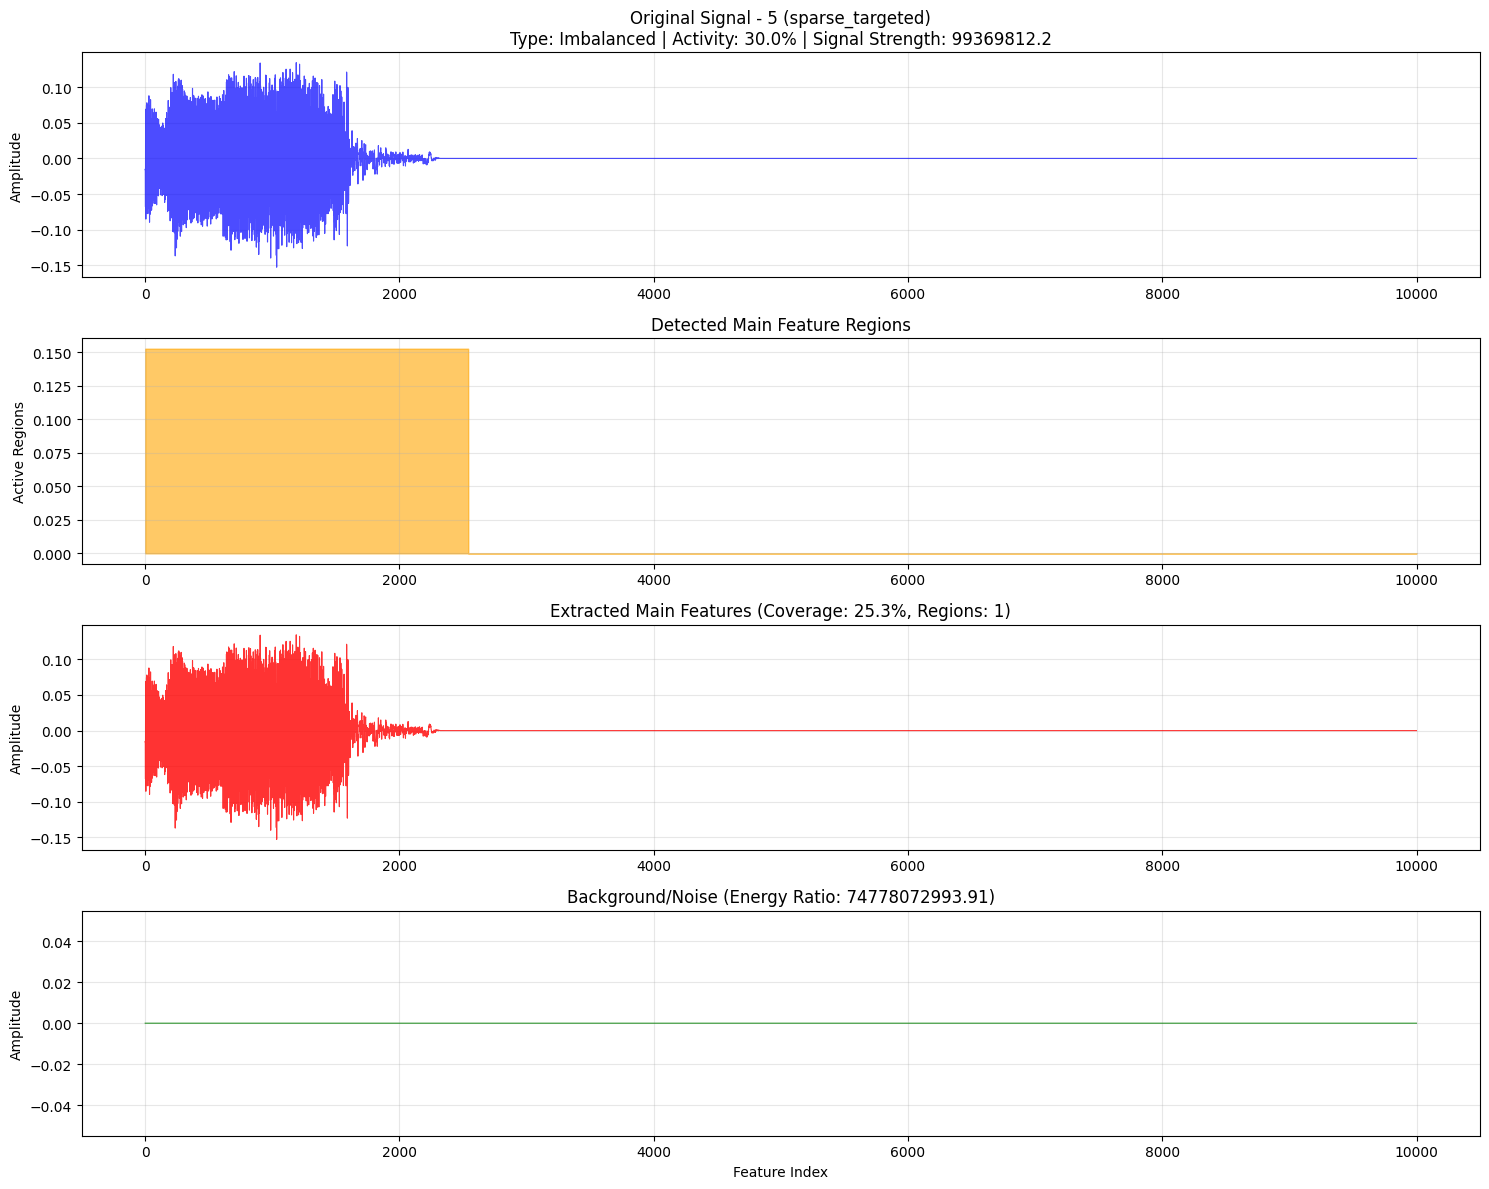


=== Separation Results ===
Method Used: sparse_targeted
Main Feature Coverage: 25.3%
Number of Main Regions: 1
Energy Separation Ratio: 74778072993.91


In [38]:
results_balanced = smart_adaptive_separation(val, index=16)
visualize_smart_separation(results_balanced)

In [43]:
from tqdm import tqdm

def extract_main_features(df, verbose=True):
    """
    Extract main features from entire dataframe using smart adaptive separation.

    Parameters:
    -----------
    df : pd.DataFrame
        Input dataframe with feature columns (prefixed with 'f') and other columns
    verbose : bool
        Show progress bar

    Returns:
    --------
    pd.DataFrame : DataFrame with main features extracted, same structure as input
    """

    # Get feature columns
    feature_cols = [col for col in df.columns if col.startswith('f')]

    # Copy dataframe to avoid modifying original
    result_df = df.copy()

    # Process each row
    iterator = tqdm(range(len(df)), desc="Extracting main features") if verbose else range(len(df))

    for idx in iterator:
        try:
            # Get separation results for this row
            results = smart_adaptive_separation(df, index=idx)

            # Replace feature columns with main features
            main_features = results['main_features']
            for i, col in enumerate(feature_cols):
                result_df.iloc[idx, result_df.columns.get_loc(col)] = main_features[i]

        except Exception as e:
            if verbose:
                print(f"Warning: Error processing row {idx}, keeping original: {str(e)}")
            # Keep original values for failed rows
            continue

    return result_df

In [44]:
main_features_df = extract_main_features(train)

Extracting main features: 100%|██████████| 280/280 [13:36<00:00,  2.92s/it]


In [45]:
main_features_val_df = extract_main_features(val)

Extracting main features: 100%|██████████| 80/80 [03:56<00:00,  2.96s/it]


In [46]:
new_train = pd.concat([train, fourier_train, main_features_df])
new_val = pd.concat([val, fourier_train, main_features_val_df])

In [47]:
new_train.shape

(840, 10003)

In [48]:
new_val.shape

(440, 10003)

In [49]:
import os

AUDIO_PATH = "data/ESC-50-master/audio"
output_path = f'{AUDIO_PATH}/for_training/final'
if not os.path.exists(output_path):
   os.makedirs(output_path)

# Save file
new_train.to_csv(f'{output_path}/train.csv')
new_val.to_csv(f'{output_path}/val.csv')
test.to_csv(f'{output_path}/test.csv')